# <font color="#8333ff">TP : Pratiquez la régression linéaire sur le jeu de données de l'ozone</font>

Mettons maintenant en œuvre la régression linéaire sur le pic d'ozone, expliqué par la température à midi. Voyons la phase d'estimation du modèle, puis mettons en œuvre une prévision.

## Importez les données

On commence par charger les librairies numpy, pandas et seaborn qui nous permettront de réaliser ce TP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

On importe le fichier ozone, qui contient 112 données recueillies dans la ville de Rennes durant l'été 2001.

In [5]:
import pandas as pd

ozone = pd.read_csv('ozone.txt', sep=";", decimal=',')

On trouve dans ce fichier des variables telles que :
- MaxO3, qui est la valeur maximale d'ozone observée sur une journée ;
- T9, T12 et T15 qui sont les températures prises respectivement à 9 h, 12 h et 15 h ;
- Ne9, Ne12, Ne15 qui sont des nébulosités prises à 9 h, 12 h et 15 h ;
- Vx9, Vx12 et Vx15 qui sont les composantes est-ouest du vent mesurées à 9 h, 12 h et 15 h ;
- MaxO3V, qui donne la teneur maximale en ozone observée la veille ;
- vent, l'orientation du vent à 12 h ;
- pluie, la présence ou non de pluie.

## Visualisez le jeu de données

Visualisons l'ensemble des données avec cette commande.

In [6]:
ozone.head()

,obs,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,vent,pluie
0,601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec


On peut représenter graphiquement le nuage de points maxO3 en fonction de T12:

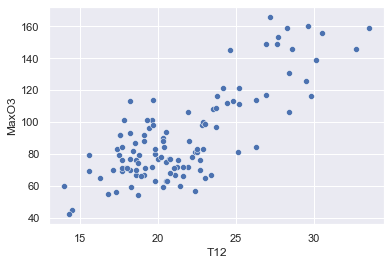

In [8]:
sns.set()

ax = sns.scatterplot(x="T12", y="maxO3", data=ozone)
ax.set(xlabel='T12', ylabel='MaxO3')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

*Ce nuage de points nous fait penser à un alignement selon une forme qui n'est pas très loin d'une droite.*

## Réalisez une régression linéaire simple

Essayons de lancer une régression linéaire simple sur ce nuage de points :

In [9]:
reg_simp = smf.ols('maxO3 ~ T12', data=ozone).fit()

Voici les résultats en sortie de cette commande :

In [10]:
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                  maxO3   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     175.8
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.51e-24
Time:                        12:06:06   Log-Likelihood:                -478.91
No. Observations:                 112   AIC:                             961.8
Df Residuals:                     110   BIC:                             967.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.4196      9.033     -3.035      0.0

Nous obtenons des statistiques sur les coefficients obtenus : leur valeur, leur écart-type, la statistique de test de Student, et la p-valeur (le test effectué sur le paramètre est ici le test de significativité : le paramètre vaut 0 versus le paramètre est différent de 0), ainsi que des statistiques sur le modèle général ($R^{2}$, $AIC$, etc...).

*Les p-valeurs sont inférieures à 5 %. À un niveau de test de 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0.
Ici, on voit que la variable T12 est significative.*

Quant au $R^{2}$, il est de l'ordre de 0.6. Ce n'est pas très élevé, mais ceci est logique au vu de la dispersion du nuage de points originel.

## Visualisez la droite de régression

Alors, voyons à quoi ressemble notre droite.

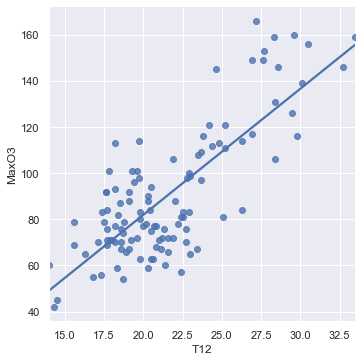

In [13]:
ax = sns.lmplot(x="T12", y="maxO3", data=ozone, ci=None, line_kws={'color':'black'})
ax.set(xlabel='T12', ylabel='MaxO3')
plt.show()

On peut également représenter les valeurs ajustées en fonction des valeurs observées :

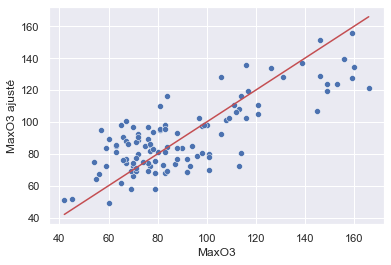

In [16]:
ozone['maxO3_ajust_s'] = reg_simp.predict() # prédictions

X_plot = [ozone['maxO3'].min(), ozone['maxO3'].max()]

ax = sns.scatterplot(x="maxO3", y="maxO3_ajust_s", data=ozone)
ax.set(xlabel='MaxO3', ylabel='MaxO3 ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.show()

La droite qui s'affiche est la première bissectrice. Si le modèle était parfait,
les valeurs réelles et les valeurs ajustées seraient égales, donc sur un tel graphique, les points seraient alignés sur la droite d'équation $y=x$, soit la première bissectrice.

## Représentez les résidus du modèle

On peut obtenir les résidus du modèle à l'aide de cette commande :

In [17]:
ozone['residu_s'] = reg_simp.resid

À partir de ceux-ci, on peut représenter l'histogramme de ces résidus.

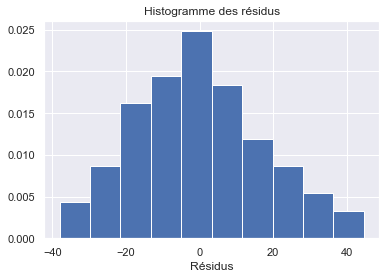

In [18]:
plt.hist(ozone['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

L'allure de l'histogramme est assez classique : centrée et à peu près symétrique.

## Prévoyez la concentration d'ozone

Prévoyons maintenant la concentration en ozone d'une journée. Sachant que la température prévue de cette journée est de 19 °C, on peut utiliser notre modèle de régression à des fins de prévision !

In [20]:
a_prevoir = pd.DataFrame({'T12':[19]})
maxO3_prev = reg_simp.predict(a_prevoir)
print(round(maxO3_prev[0], 2))

76.49


On obtient une concentration d'ozone d'environ 76.5.

*Jusqu'à maintenant, la régression linéaire ne fait intervenir qu'une seule variable explicative. Plus tard (en partie 3), nous verrons des régressions linéaires plus complexes, avec plus de variables explicatives, comme les autres températures, les vitesses de vent, etc.*